# Linear Regression model in Tensorflow

In [203]:
import numpy as np
import tensorflow as tf
print tf.__version__

1.1.0


## Problem

- Input: X
- Target: Y

We would like to find the *best* mapping between X and Y, two list of floats linearly linked by a linear function *f*

In other words, we would like to find the best parameters **a** and **b** for the function *f*, *f(X) = ax + b*, that maps our input **X** to our target **Y** the most accurately possible.

## Data

In [204]:
def f(x, a, b): return a*x + b

In [205]:
# true_a and true_b chosen arbitrarily
true_a = 2
true_b = 3

First, let's create our input and output (target)

In [206]:
inputs = np.random.random((INPUT_DIM,))
targets = f(inputs, true_a, true_b)
print inputs.shape, targets.shape
print 'Inputs: {}'.format(inputs) 
print 'Targets: {}'.format(targets)

(10,) (10,)
Inputs: [ 0.29242509  0.95448529  0.32435693  0.06763678  0.2548839   0.69696696
  0.34609989  0.64646233  0.43982727  0.89539333]
Targets: [ 3.58485018  4.90897057  3.64871386  3.13527356  3.5097678   4.39393391
  3.69219978  4.29292466  3.87965455  4.79078666]


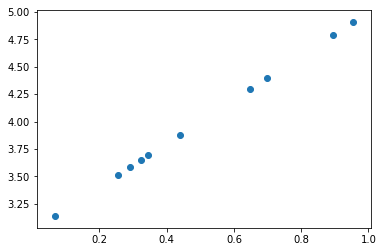

In [207]:
%matplotlib inline
from matplotlib import pyplot as plot

plot.scatter(inputs,targets)

## Model

Then, let's initialize our variables a and b

In Tensorflow, `Variable`s are the model's hyperparameters we need to tune (or fit) in order to have better predictions. We set them to an arbitrary default value for this simple example.

Many techniques exist to initialized those variables to a *not so bad* default value. Having a better initial value for parameters reduces training time as the model's predictions will be (hopefully) closer than with a random init. 

In [226]:
# a and b arbitrarily initialized
a = tf.Variable(-1.0, name='coeff_a')
b = tf.Variable(1.0, name='coeff_b')

`placeholder`s have been designed to feed the network with external data

`x` is our inputs and `y` is our targets, i.e our gold-standard floats the model will compare his predictions with  

In [209]:
x = tf.placeholder(tf.float32, name='inputs')
y = tf.placeholder(tf.float32, name='targets')

In [229]:
y_pred = tf.multiply(a, x) + b # Similary, we may simply use y_pred = f(x, a, b) but let's do stuff in Tensorflow :D 

[ 0.7075749   0.0455147   0.67564309  0.93236321  0.74511611  0.30303305
  0.65390015  0.35353768  0.56017274  0.10460669]


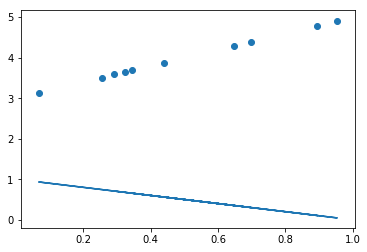

In [228]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    preds = sess.run(y_pred, feed_dict={x: inputs, y: targets})
    print(preds)
    plot.plot(inputs, preds)
    plot.scatter(inputs, targets)

The predictions are far away from the real targets. We need to tune **a** and **b** to improve our predictions

To tune **a** and **b**, we need something that tells how bad the predictions are from the real values. Thus, we need a *loss function*

### Loss function

We define our *loss function* as the Mean Squared Error (mse). We may use the built-in `tf.metrics.mean_squared_error()` in Tensorflow but let's try to implement it from scratch 

In [212]:
loss = tf.reduce_mean(tf.square(y_pred - targets))

### Optimizer

The optimizer is the part of the graph that will minimize the loss by updating the variables accordingly.

We will use SGD optimizer with the default learning rate (0.1)

In [219]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [220]:
# Tells SGD that or objective function is the loss function defined above
# It will try to optimize it, i.e make it as low as possible.
train = optimizer.minimize(loss)

### Train

Training consists in looping an arbitrary number of times and calling the *train* operation defined above.

It will make a prediction, calculate the loss and adjust the variable **a** and **b** accordingly

In [222]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    preds = None
    for _ in range(1000):
        preds = sess.run(train, feed_dict={x: inputs, y: targets})
    
    # At the end of the training, print the new a and b
    a_pred, b_pred, final_loss = sess.run([a, b, loss], feed_dict={x: inputs, y: targets})
    print a_pred, b_pred, final_loss

1.99999 3.0 4.12683e-12


After 1000 epochs (training time: ~1sec):
- a_pred = 1.99 (where true_a = 2)
- b_pred = 3.0 (where true_b = 3) 

## Awesome !

**Congratulations**: We've just built a very simple linear regression model

It is worth mentionning we could have used the pre-built `tf.contrib.learn.LinearRegressor()` linear regressor that comes along the new high-level API `tf.contrib.learn`

/!\ `tf.contrib.learn` is subject to change !